<center>
<h4>Diplomatura AACSyA 2018 - FaMAF - UNC</h4>
<h3>Análisis y visualización de datos</h3>
</center>

# Tarea integradora - Parte 1

En esta notebook presentamos una serie de ejercicios para trabajar con variables aleatorias discretas, tanto númericas como cátegoricas, ejemplificando los conceptos de probabilidad explicados en clase. Lo primero es determinar si todas las librerías están correctamente instaladas.

In [1]:
# %matplotlib notebook
%matplotlib inline
import pandas
import numpy
import seaborn 

In [2]:
seaborn.set_style('whitegrid')
seaborn.set_context('talk')

## Cargar el dataset en un dataframe de pandas

Los dataframes son tablas con un montón de operaciones ya programadas. Prácticamente todas las funciones de SQL se pueden realizar en pandas con pocas líneas. Además de eso, tiene funciones para leer y escribir archivos en numerosos formatos.

Ahora leemos directamente el archivo .csv

In [3]:
dataset = pandas.read_csv('https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/violencia-institucional-2018-01.csv',
                          encoding='utf8')

In [4]:
dataset[:3]

,area,organismo_origen,via_acceso,año,provincia,contexto,contexto1,circunstancia,alojamiento,violencia_fisica,violencia_psiquica,violencia_genero,violencia_salud,resumen_hecho,descripcion_institucion,establecimiento,Unnamed: 16
0,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2017,00",Buenos Aires,Situaciones de Detención,Penal / Complejo Penitenciario PROVINCIAL,NaN,NaN,NaN,NaN,NaN,Denegación acceso atención médica,NaN,Servicio Penitenciario Provincial,UPP Nº 13 Junin,NaN
1,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2017,00",Buenos Aires,Situaciones de Detención,Penal / Complejo Penitenciario PROVINCIAL,NaN,"Malas condiciones de alojamiento (higiene), Hu...",NaN,NaN,NaN,Denegación acceso atención médica,NaN,Servicio Penitenciario Provincial,UPP Nº 13 DE JUNIN,NaN
2,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2017,00",Buenos Aires,Situaciones de Detención,Penal / Complejo Penitenciario PROVINCIAL,NaN,Malas condiciones de alojamiento (higiene),NaN,NaN,NaN,NaN,NaN,Servicio Penitenciario Provincial,UPP Nº 36 de Magdalena,NaN


Los valores para los años no tienen un formato consistente en todas las filas, por lo que los procesaremos antes de comenzar. Los valores de año faltantes son reemplazados por NaN, y como la representación de enteros de numpy no soporta este tipo de valores, convertiremos cada año a tipo numpy.float. Otras decisiones pueden ser tomadas en este punto, como reemplazar los valores faltantes por 0 o elminarlos del dataset, dependiendo del tipo de datos que se requiera.

También cambiaremos el nombre de la columna año, ya que el caracter ñ no permite utilizar el syntax sugar de pandas donde se obtienen los valores de la columna con la sintáxis de llamar a un método.

In [5]:
import six
def convert_to_int(row):
    try:
        return float(row)
    except ValueError:
        if isinstance(row, six.string_types):
            return float(row.split(',')[0])
        return row

dataset.loc[:,'year'] = dataset[u'año'].apply(convert_to_int)
# Se podrían también decodicar los nombres de provincias
# dataset.loc[:,'provincia'] = dataset.provincia.apply(lambda x: x.decode("utf-8"))

In [6]:
dataset.shape, dataset.year.dropna().shape

((1439, 18), (1316,))

---
# Ejercicios

## Ejercicio 1

* Crear una imagen mostrando la distribución de los eventos por año.

* Construir una tabla de frecuencia de probabilidades dado el evento Y = ’año en el que ocurrió’:

$$fdp(Y)$$

* Crear una imagen de dichas probabilidades con el gráfico que considere adecuado. ¿Son ambos gráficos iguales? ¿Cuál considera que es más útil?

* ¿A qué se debe la forma de la distribución? ¿Qué tendencia muestra? ¿Ha aumentado la violencia institucional en los últimos años?

* Calcular la función de distribución acumulada de la variable Y y graficarla. ¿Cuál es la probabilidad de que haya dado un acto de violencia antes del último cambio de gobierno?

IMPORTANTE: ¿Qué hacemos con los datos faltantes?

En una primera instancia, calculamos la distribución de los eventos según el año en el que se produjeron.

<div class="alert alert-block alert-info">
Para calcular la frecuencia por año, optamos por **descartar** los eventos que no tenían datos en este campo
</div>

In [7]:
fq_year = dataset.year.value_counts()
fq_year.sort_index(0)

1988.0      1
1989.0      1
1990.0      5
1991.0      5
1993.0      2
1994.0      3
1996.0      1
1997.0      1
1998.0      2
1999.0      2
2000.0      3
2001.0      3
2002.0      7
2003.0      9
2004.0      2
2005.0      3
2006.0      3
2007.0      5
2008.0      5
2009.0     10
2010.0     21
2011.0     16
2012.0     62
2013.0    285
2014.0    241
2015.0     87
2016.0    297
2017.0    234
Name: year, dtype: int64

La siguiente imagen muestra la distribución de los eventos por año.

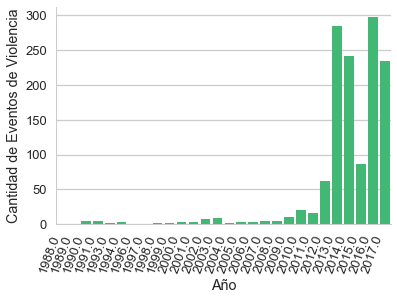

In [39]:
graph = seaborn.barplot(data=fq_year.to_frame().reset_index(),
    x='index', y='year', color='#2ecc71')
graph.set_xticklabels(graph.get_xticklabels(), rotation=70, ha="right")
graph.set_ylabel('Cantidad de Eventos de Violencia')
graph.set_xlabel('Año')
seaborn.despine()

La tabla de **frecuencia de probabilidades** de los eventos por año se calcula como sigue:

In [9]:
fdp_year = dataset.year.value_counts(normalize=True)
fdp_year.sort_index(0)

1988.0    0.000760
1989.0    0.000760
1990.0    0.003799
1991.0    0.003799
1993.0    0.001520
1994.0    0.002280
1996.0    0.000760
1997.0    0.000760
1998.0    0.001520
1999.0    0.001520
2000.0    0.002280
2001.0    0.002280
2002.0    0.005319
2003.0    0.006839
2004.0    0.001520
2005.0    0.002280
2006.0    0.002280
2007.0    0.003799
2008.0    0.003799
2009.0    0.007599
2010.0    0.015957
2011.0    0.012158
2012.0    0.047112
2013.0    0.216565
2014.0    0.183131
2015.0    0.066109
2016.0    0.225684
2017.0    0.177812
Name: year, dtype: float64

El siguiente gráfico de barras muestra la **distribución de probabilidades** de los eventos según el año. La diferencia con el anterior es la **escala del eje Y**, que ahora indica una probabilidad en lugar de una frecuencia absoluta.

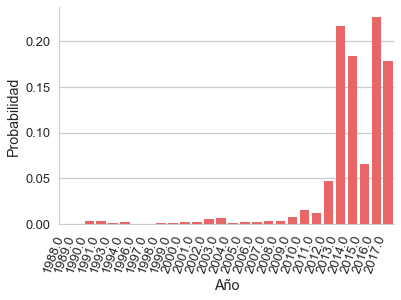

In [40]:
graph_fdp = seaborn.barplot(data=fdp_year.to_frame().reset_index(),
    x='index', y='year', color='#ff5050')
graph_fdp.set_xticklabels(graph_fdp.get_xticklabels(), rotation=70, ha="right")
graph_fdp.set_ylabel('Probabilidad')
graph_fdp.set_xlabel('Año')
seaborn.despine()

La forma de la distribución puede deberse a un **aumento exponencial en la cantidad absoluta de casos de violencia institucional**. Aún si los casos con datos faltantes corresponden a registros anteriores al año 2013, estaremos observando una distribución sólo levemente distorsionada o sesgada, ya que estos casos no representan un porcentaje significativo sobre el total (8.5%).

Luego, la cantidad de casos de violencia institucional muestra una **tendencia creciente en el tiempo**. De todos modos, es necesario considerar otra variable que pondere esta cantidad para hacerla comparable en el tiempo, como por ejemplo la población de cada año.

A continuación, calculamos la función de distribución acumulada de los casos de violencia institucional a través de los años.

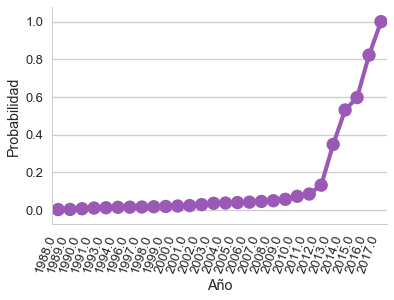

In [41]:
fdp_acum = fdp_year.sort_index(0).cumsum()

graph_fdp_acum = seaborn.pointplot(data=fdp_acum.to_frame().reset_index(),
    x='index', y='year', markers=["o"], linestyles=["-"], color='#9b59b6')
graph_fdp_acum.set_xticklabels(graph_fdp_acum.get_xticklabels(), rotation=70, ha="right")
graph_fdp_acum.set_ylabel('Probabilidad')
graph_fdp_acum.set_xlabel('Año')

seaborn.despine()

El gráfico muestra esta función de distribución acumulada.

In [12]:
x = fdp_acum.reset_index()
x[x['index'] == 2015]

,index,year
25,2015.0,0.596505


Finalmente, la probabilidad de que se haya producido un acto de violencia institucional antes del último cambio de gobierno es de 0.5965.

## Ejercicio 2

* Construir una tabla de frecuencia de probabilidades dado el evento X = ’provincia donde se desarrollo el hecho’

$$fdp(X)$$

* ¿Qué información adicional es necesaria para mostrar estos datos de manera más adecuada?
* Muestre la distribución de los eventos visualmente. ¿Qué tipo de gráfico es más adecuado para mostrar esta información?

Calculamos la **tabla de frecuencia de probabilidades** de los eventos según la provincia en la que se produjeron

<div class="alert alert-block alert-info">
Nuevamente, para calcular la frecuencia por provincia, optamos por **descartar** los eventos que no tenían datos en este campo.
</div>

In [13]:
fdp_provincia = dataset.provincia.value_counts(normalize=True)
fdp_provincia

Buenos Aires              0.693182
Ciudad de Buenos Aires    0.083097
Córdoba                   0.036932
Chubut                    0.026278
Chaco                     0.020597
Rio Negro                 0.019176
Neuquen                   0.014915
Santa Fe                  0.014205
Salta                     0.012074
Mendoza                   0.012074
Misiones                  0.007812
La Pampa                  0.007102
Tucuman                   0.007102
Santiago del Estero       0.007102
Formosa                   0.007102
Entre Rios                0.006392
Jujuy                     0.006392
La Rioja                  0.004261
Corrientes                0.003551
Santa Cruz                0.002841
San Luis                  0.002841
San Juan                  0.002131
Catamarca                 0.001420
Tierra del Fuego          0.001420
Name: provincia, dtype: float64

Para mostrar estos datos de manera adecuada, sería necesaria una variable normalizadora que haga las ocurrencias de eventos por provincia **comparables**. Podrían ser, por ejemplo, la población o el territorio en km2.

Para mostrar la distribución de los eventos por provincia elegimos un **gráfico de barras**. Además, utilizamos una **escala logarítmica**, que nos permite capturar mejor la variabilidad entre provincias, dada la gran diferencia que presentan Buenos Aires y CABA respecto al resto del país.

C:\Users\Julieta\Anaconda3\lib\site-packages\matplotlib\scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


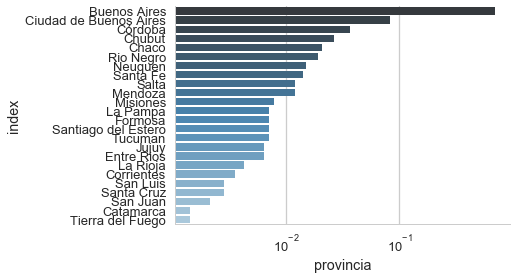

In [42]:
g = seaborn.barplot(x="provincia", y="index", data=fdp_provincia.to_frame().reset_index(),palette="Blues_d")
g.set(xscale="log")
seaborn.despine()

## Ejercicio 3

* Construir una tabla de doble entrada donde se observe la función de distribución de probabilidades con las 2 variables aleatorias anteriores.
¿Son eventos independientes?

* Crear una imagen de dichas probabilidades con el gráfico que considere adecuado.


Para calcular la **distribución de probabilidades por año y provincia**, construimos la siguiente tabla de doble entrada:

<div class="alert alert-block alert-info">
En este caso, para calcular la probabilidad conjunta también optamos por **descartar** los eventos con datos faltantes en alguno de estos dos campos.
</div>

In [59]:
tabla_prov_anio = pandas.crosstab(index=dataset['provincia'],columns=dataset['year'],margins=True,normalize=True)
tabla_prov_anio

year,1988.0,1989.0,1990.0,1991.0,1993.0,1994.0,1996.0,1997.0,1998.0,1999.0,...,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,All
provincia,,,,,,,,,,,,,,,,,,,,,
Buenos Aires,0.000000,0.000766,0.000000,0.002299,0.000000,0.000766,0.000000,0.000000,0.000000,0.000000,...,0.003065,0.006130,0.006897,0.016092,0.150192,0.125670,0.037548,0.178544,0.143295,0.685057
Catamarca,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000766,0.000000,0.000766
Chaco,0.000000,0.000000,0.003065,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.005364,0.006130,0.002299,0.002299,0.002299,0.000766,0.022222
Chubut,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.002299,0.000000,0.002299,0.004598,0.006897,0.001533,0.001533,0.005364,0.026054
Ciudad de Buenos Aires,0.000766,0.000000,0.000000,0.001533,0.000000,0.000000,0.000766,0.000766,0.000766,0.000000,...,0.003831,0.000766,0.001533,0.007663,0.017625,0.018391,0.007663,0.008429,0.009195,0.085824
Corrientes,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.001533,0.000000,0.000766,0.000766,0.000000,0.003065
Córdoba,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.001533,0.002299,0.003065,0.003831,0.003065,0.009962,0.008429,0.007663,0.039847
Entre Rios,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000766,0.000000,0.006130,0.000000,0.000000,0.000000,0.006897
Formosa,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.002299,0.002299,0.000766,0.000766,0.000766,0.007663


Para comprobar si estas dos variables aleatórias son independientes, debemos verificar lo siguiente:

$$ P(X=Anio \cap Y=Provincia)=P(Anio).P(Provincia) $$

Si esta igualdad se cumple, las variables serán independientes.  De lo contrario, no lo serán. Esto implica que, para que las variables sean independientes, se tiene que cumplir que:

$$ P(X=Anio \cap Y=Provincia)-P(Anio).P(Proivincia)=0 $$

Calculamos, por un lado, el producto de las probabilidades totales:

In [120]:
provs=dataset['provincia'].value_counts(normalize=True)
year=dataset['year'].value_counts(normalize=True)

prod_p_tot = numpy.outer(provs.values,year.values)
prod_p_tot

array([[1.56439970e-01, 1.50119163e-01, 1.26942871e-01, 1.23255734e-01,
        4.58258497e-02, 3.26575021e-02, 1.10614120e-02, 8.42774247e-03,
        5.26733904e-03, 4.74060514e-03, 3.68713733e-03, 2.63366952e-03,
        2.63366952e-03, 2.63366952e-03, 2.63366952e-03, 1.58020171e-03,
        1.58020171e-03, 1.58020171e-03, 1.58020171e-03, 1.58020171e-03,
        1.05346781e-03, 1.05346781e-03, 1.05346781e-03, 1.05346781e-03,
        5.26733904e-04, 5.26733904e-04, 5.26733904e-04, 5.26733904e-04],
       [1.87535619e-02, 1.79958423e-02, 1.52175368e-02, 1.47755336e-02,
        5.49346764e-03, 3.91488498e-03, 1.32600943e-03, 1.01029290e-03,
        6.31433062e-04, 5.68289755e-04, 4.42003143e-04, 3.15716531e-04,
        3.15716531e-04, 3.15716531e-04, 3.15716531e-04, 1.89429918e-04,
        1.89429918e-04, 1.89429918e-04, 1.89429918e-04, 1.89429918e-04,
        1.26286612e-04, 1.26286612e-04, 1.26286612e-04, 1.26286612e-04,
        6.31433062e-05, 6.31433062e-05, 6.31433062e-05, 6.31433

Por el otro, tomamos las probabilidades conjuntas de la tabla de frecuencia de probabilidades ya elaborada:

In [121]:
fdp_prov_year = pandas.crosstab(index=dataset['provincia'],
                            columns=dataset['year'],margins=False,normalize=True)
fdp_conj = fdp_prov_year.values
fdp_conj

array([[0.        , 0.00076628, 0.        , 0.00229885, 0.        ,
        0.00076628, 0.        , 0.        , 0.        , 0.        ,
        0.00076628, 0.        , 0.00383142, 0.00153257, 0.00153257,
        0.00076628, 0.        , 0.00306513, 0.00229885, 0.00306513,
        0.00613027, 0.00689655, 0.01609195, 0.15019157, 0.1256705 ,
        0.03754789, 0.17854406, 0.14329502],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00076628, 0.        ],
       [0.        , 0.        , 0.00306513, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

Finalmente, calculamos la diferencia entre una matriz y la otra. Además, tomamos el valor absoluto, para que nos posibilite obtener conclusiones gráficas.

In [122]:
diferencia = prod_p_tot - fdp_conj
diferencia

array([[ 1.56439970e-01,  1.49352879e-01,  1.26942871e-01,
         1.20956883e-01,  4.58258497e-02,  3.18912185e-02,
         1.10614120e-02,  8.42774247e-03,  5.26733904e-03,
         4.74060514e-03,  2.92085381e-03,  2.63366952e-03,
        -1.19774810e-03,  1.10110247e-03,  1.10110247e-03,
         8.13918188e-04,  1.58020171e-03, -1.48493239e-03,
        -7.18648862e-04, -1.48493239e-03, -5.07680039e-03,
        -5.84308392e-03, -1.50384862e-02, -1.49138103e-01,
        -1.25143764e-01, -3.70211588e-02, -1.78017327e-01,
        -1.42768285e-01],
       [ 1.87535619e-02,  1.79958423e-02,  1.52175368e-02,
         1.47755336e-02,  5.49346764e-03,  3.91488498e-03,
         1.32600943e-03,  1.01029290e-03,  6.31433062e-04,
         5.68289755e-04,  4.42003143e-04,  3.15716531e-04,
         3.15716531e-04,  3.15716531e-04,  3.15716531e-04,
         1.89429918e-04,  1.89429918e-04,  1.89429918e-04,
         1.89429918e-04,  1.89429918e-04,  1.26286612e-04,
         1.26286612e-04,  1.26

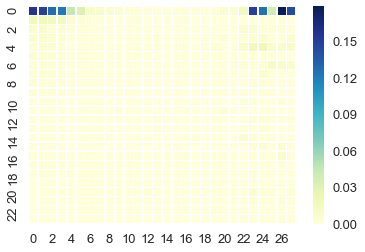

In [123]:
import matplotlib.pyplot as plt
ax = seaborn.heatmap(numpy.absolute(diferencia), linewidth=0.5,cmap="YlGnBu",vmin = 0)
plt.show()

Luego, dada la muestra, **no podemos concluir que se trate de eventos independientes**, ya que el valor de la diferencia se aleja de cero en muchos de los casos.

Para representar las **probabilidades conjuntas por provincia y año**, elegimos dos tipos de gráficos:
* Un heatmap, y
* Un gráfico de barras apiladas por provincia.

Text(0.5,10.9,'Año')

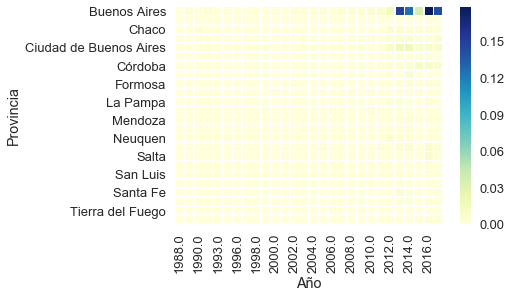

In [124]:
tabla_prov_anio_graph = pandas.crosstab(index=dataset['provincia'],columns=dataset['year'],margins=False,normalize=True)

heatMap = seaborn.heatmap(tabla_prov_anio_graph, linewidth=0.5,cmap="YlGnBu")
heatMap.set_ylabel('Provincia')
heatMap.set_xlabel('Año')


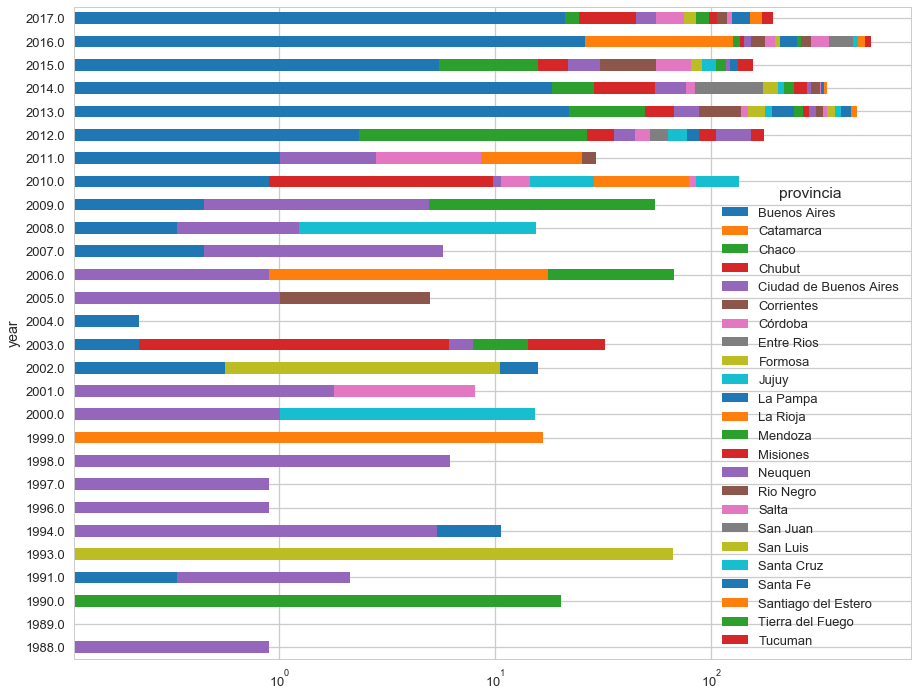

In [125]:
tabla_prov_anio_graph.transpose().apply(
    lambda r: r/r.sum()*100,axis=0).plot(kind='barh',stacked=True, logx=True, figsize=(15,12))

## Ejercicio 4

Dada la variable aleatoria Z = ’contexto1 en el que se produjo el hecho’, calcular la probabilidad que el hecho sea producido en una dependencia de una fuerza de seguridad (penal, comisaría, etc)

$$ fdp(z=penal ~~ |~~  z=comisaria ~~ | ...) $$

Inicialmente, calculamos la **frecuencia de probabilidades** de los eventos, de acuerdo al contexto (campo *contexto1*) en el que se produjo el hecho de violencia:

In [39]:
fdp_contexto = dataset.contexto1.value_counts(normalize=True)
fdp_contexto

Penal / Complejo Penitenciario PROVINCIAL                              0.365343
Penal / Complejo Penitenciario FEDERAL                                 0.321300
Espacio Público                                                        0.153069
Comisaría                                                              0.091697
Domicilio Particular                                                   0.016606
Centros de Detención Previos al Juicio (Alcaidia)                      0.011552
Móviles y medios de transporte de Fuerzas de Seguridad                 0.009386
Lugar No Identificado                                                  0.008664
Establecimiento de Salud Mental                                        0.005054
Centros de Detención Preventiva                                        0.004332
Hospital General                                                       0.003610
Instalaciones de la Gendarmería Nacional                               0.002888
Escuelas de Formación Fuerzas Provincial

Ahora, para calcular la probabilidad de que el hecho sea producido en una dependencia de una fuerza de seguridad, construimos un vector indicando cuáles de estos contextos representan una dependencia de una fuerza de seguridad.

De este modo, tomaremos sólo estos contextos para finalmente calcular la **probabilidad conjunta** como la suma de las probabilidades de los contextos a considerar:

In [40]:
s = pandas.Series([True, True, False, True, False, True, True, False, False, True, False, True, True, True, False, False, True]
                  , name='bools')

fdp_contexto_filt = fdp_contexto[s.values]

fdp_contexto_filt.sum('index')

0.8108303249097474

Luego, la probabilidad de que el hecho de violencia institucional sea producido en una dependencia de una fuerza de seguridad es de 0.8108.

## Ejercicio 5

Dada la variable aleatoria M = ‘existió violencia fisica’:
* ¿Que probabilidad existe que también tenga violencia psíquica? N = ‘existió violencia psíquica’:

$$P(N~~|~~M)$$

* ¿Qué conclusión se puede formular de los datos que tenemos y los datos que obtenemos de los métodos probabilísticos?
* ¿Podemos concluir en que son eventos independientes dadas las muestras?

Primero exploramos los datos, para hacer un análisis de las categorías. De este modo podremos definir las variables aleatorias M = 'Existió Violencia Física' y N = 'Existió Violencia Psíquica'. Luego, obtenemos la tabla de frecuencias para ambos campos.

In [61]:
dataset['violencia_fisica'].value_counts(dropna=False)

NaN                                                                                                                                                                           849
Golpes                                                                                                                                                                        230
Muerte                                                                                                                                                                        102
Heridas penetrantes                                                                                                                                                            39
Otras formas de maltrato físico                                                                                                                                                32
Golpes, Otras formas de maltrato físico                                                                       

In [87]:
dataset['violencia_psiquica'].value_counts(dropna=False)

NaN                                                                                                                                                                                                               952
Otras formas de maltrato psicológico                                                                                                                                                                              152
Alejamiento de vínculos                                                                                                                                                                                            78
Amenazas                                                                                                                                                                                                           62
Restricción injustificada derechos al trabajo y la educación                                                                                    

Para calcular la probabilidad condicional de N dado M, tendremos que calcular lo siguiente:

$$P(N~~|~~M)=P(N \cap M)~~/~~P(M)$$

<div class="alert alert-block alert-info">
Por la estructura de los datos, entendemos que el método adecuado implica contar aquellos casos en los que **NO aparece información en el campo** como casos en los que **NO existió violencia**, tanto para violencia física como psíquica. Además, tampoco existe violencia si en el campo se indica **'Ninguno'**.
</div>

Definimos entonces nuestras variables aleatorias M y N:

In [88]:
M_violencia_fisica = (dataset['violencia_fisica'] != 'Ninguno') & (dataset['violencia_fisica'].notnull())
N_violencia_psiquica = (dataset['violencia_psiquica'] != 'Ninguno') & (dataset['violencia_psiquica'].notnull())

dataset['violencia_fisica_bool'] = M_violencia_fisica
dataset['violencia_psiquica_bool'] = N_violencia_psiquica

dataset.violencia_fisica_bool

0       False
1       False
2       False
3       False
4        True
5        True
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14       True
15      False
16      False
17      False
18      False
19       True
20       True
21      False
22      False
23      False
24      False
25       True
26      False
27      False
28      False
29      False
        ...  
1409    False
1410     True
1411    False
1412     True
1413    False
1414    False
1415     True
1416     True
1417    False
1418    False
1419     True
1420     True
1421    False
1422    False
1423    False
1424     True
1425    False
1426    False
1427    False
1428    False
1429     True
1430    False
1431    False
1432    False
1433    False
1434    False
1435    False
1436    False
1437    False
1438     True
Name: violencia_fisica_bool, Length: 1439, dtype: bool

Obtenemos $P(M)~~y~~(\neg M)$ :

In [91]:
v_fis = dataset.violencia_fisica_bool.value_counts(normalize=True)
v_fis

False    0.593468
True     0.406532
Name: violencia_fisica_bool, dtype: float64

In [115]:
print('Probabilidad Violencia Física: ' + str(v_fis.values[1]))

Probabilidad violencia fisica: 0.4065323141070188


Obtenemos $P(N)~~y~~(\neg N)$ :

In [92]:
v_psi = dataset.violencia_psiquica_bool.value_counts(normalize=True)
v_psi

False    0.663655
True     0.336345
Name: violencia_psiquica_bool, dtype: float64

In [116]:
print('Probabilidad Violencia Psíquica: ' + str(v_psi.values[1]))

Probabilidad Violencia Psíquica: 0.33634468380820015


Obtenemos $P(N \cap M)$, a partir de la tabla de probabiliades para las dos variables:

In [97]:
fdp_v_fis_psi = pandas.crosstab(index=dataset['violencia_psiquica_bool'],
                            columns=dataset['violencia_fisica_bool'],margins=True,normalize=True)
fdp_v_fis_psi

violencia_fisica_bool,False,True,All
violencia_psiquica_bool,,,
False,0.343294,0.320361,0.663655
True,0.250174,0.086171,0.336345
All,0.593468,0.406532,1.000000


La probabilidad conjunta de que exista violencia física y violencia psíquica es:

In [117]:
print('Probabilidad Violencia Física y Psíquica: ' + str(fdp_v_fis_psi.values[1][1]))

Probabilidad Violencia Física y Psíquica: 0.08617095205003475


Finalmente, calculamos la **probabilidad condicional de que exista violencia psíquica, dado que existió violencia física** como:

In [118]:
x = fdp_v_fis_psi.values[1][1]/v_fis.values[1]
print('Probabilidad de Violencia Psíquica dado que Existió Violencia Física: ' + str(x))

Probabilidad de Violencia Psíquica dado que Existió Violencia Física: 0.21196581196581196


Es decir, a partir de estos datos podemos **concluir** que existe una probabiliad de alrededor de 1/5 de que haya existido violencia psíquica, dado que existió violencia física.
Además, en aproximadamente el 40% de los casos existió violencia física; mientras que en más del 30% existió violencia psíquica.

Para comprobar, en base a la muestra, si estos dos eventos son independientes o no, debemos verificar lo siguiente:

$$ P(M \cap N)=P(M).P(N) $$

Si esta igualdad se cumple, las variables serán independientes.  De lo contrario, no lo serán. Esto implica que, para que las variables sean independientes, se tiene que cumplir que:

$$ P(M \cap N)-P(M).P(N)=0 $$

Calculamos, por un lado, el producto de las probabilidades totales:

In [108]:
prod_p_tot = numpy.outer(v_fis.values,v_psi.values)
prod_p_tot

array([[0.39385798, 0.1996097 ],
       [0.26979733, 0.13673498]])

Por el otro, tomamos las probabilidades conjuntas de la tabla de frecuencia de probabilidades ya elaborada:

In [111]:
fdp_v_fis_psi = pandas.crosstab(index=dataset['violencia_psiquica_bool'],
                            columns=dataset['violencia_fisica_bool'],margins=False,normalize=True)
fdp_conj = fdp_v_fis_psi.values
fdp_conj

array([[0.34329395, 0.32036136],
       [0.25017373, 0.08617095]])

Finalmente, calculamos la diferencia entre una matriz y la otra. Además, tomamos el valor absoluto, para que nos posibilite obtener conclusiones gráficas.

In [112]:
diferencia = prod_p_tot - fdp_conj
diferencia

array([[ 0.05056403, -0.12075166],
       [ 0.0196236 ,  0.05056403]])

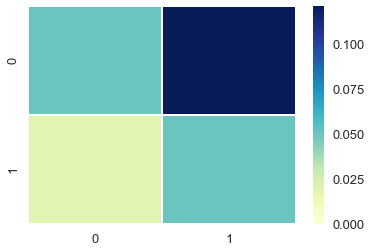

In [114]:
import matplotlib.pyplot as plt
ax = seaborn.heatmap(numpy.absolute(diferencia), linewidth=0.5,cmap="YlGnBu",vmin = 0)
plt.show()


Luego, dada la muestra, **no podemos concluir que se trate de eventos independientes**, ya que el valor de la diferencia se aleja de cero en la mayor parte de los casos.